# DS-7331 Machine Learning Project 3
## Airbnb Clustering Tasks
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Projects/blob/main/Project_2_Final_Team.ipynb

## Introduction

Our project utilizes Airbnb data from kaggle.com.

The main objective of this project is to perform cluster analyses to simply and potentially create more efficient classification models than the previous project.

### Table of Contents
0. Libraries and Loading Data
<br>
1. Business Understanding
    <br>
2. Data Understanding
    <br>
    2.1 Data Meaning
    <br>
    2.2 Data Quality
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1 Missing Values
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2 Outliers
    <br>
3. Modeling and Evaluation
    <br>
    3.1 KMeans Clustering Analysis
    <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.1 Selecting Optimal K-Clusters Value
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.2 Internal And External Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.3 Results
        <br>
    3.2 Hierichial Clustering Analysis
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.1 Selecting Optimal Clusters
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.2 Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.3 Results
        <br>
     3.3 DBScan Clustering Analysis
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.1 Selecting Optimal Clusters
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.2 Validation Measures
        <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.3.3 Results
        <br>
     3.4 Comparison of all Clustering Techniques
     <br>
4. Deployment
<br>
5. Exceptional Work - Applying cluster analyses to Classification Models?

### 0. Libraries and Loading Data

In [1]:
#loading libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics as mt

from sklearn.cluster import KMeans

In [2]:
pdata = pd.read_csv("airbnb1.csv")

### 1. Business Understanding

The dataset our team chose was the Airbnb data from kaggle.com because of the volume of instances and numerous features. We will measure the effectiveness of our cluster analyses based on the 

### 2. Data Understanding

#### 2.1 Data Meaning

In [3]:
pdata['price'] = np.exp(pdata.log_price)

Adding the price will give our team an idea on how dispersed our data really is, and can easily display if we have any outliers within this dataset.

In [4]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30739 entries, 0 to 30738
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30739 non-null  int64  
 1   log_price               30739 non-null  float64
 2   property_type           30739 non-null  object 
 3   room_type               30739 non-null  object 
 4   accommodates            30739 non-null  int64  
 5   bathrooms               30645 non-null  float64
 6   bed_type                30739 non-null  object 
 7   cancellation_policy     30739 non-null  object 
 8   cleaning_fee            30739 non-null  bool   
 9   city                    30739 non-null  object 
 10  description             30739 non-null  object 
 11  first_review            24150 non-null  object 
 12  host_has_profile_pic    30648 non-null  object 
 13  host_identity_verified  30648 non-null  object 
 14  host_response_rate      23119 non-null

#### 2.2 Data Quality

##### 2.2.1 Missing Values

##### 2.2.2 Outliers

In [5]:
pdata.nunique()

id                        30739
log_price                   614
property_type                31
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               30615
first_review               2234
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           76
host_since                 2902
instant_bookable              2
last_review                1132
latitude                  30731
longitude                 30713
neighbourhood               571
number_of_reviews           314
review_scores_rating         48
zipcode                     606
bedrooms                     11
beds                         17
price                       614
dtype: int64

In [6]:
#transforming the property type to a binary classification
value_list = ["Apartment","House","Condominium","Townhouse","Loft"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

In [7]:
#evaluating the data after transformation
pdata.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,region
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Brooklyn Heights,2,100.0,11201,1.0,1.0,150.0,East
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,169.0,East
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,145.0,East
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Lower Haight,0,NaN,94117,2.0,2.0,750.0,West
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,115.0,East


In [8]:
#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0,"House": 1,"Condominium": 2,"Townhouse": 3,"Loft": 4, "other": 5},
                "region": {"East": 0, "West": 1},
                "room_type": {"Entire home/apt": 0, "Private room": 1, "Shared room": 2},
                "bed_type": {"Real Bed": 0, "Futon": 1, "Pull-out Sofa": 2, "Couch": 3, "Airbed": 4},
                "city": {"NYC": 0, "SF": 1, "DC": 2, "LA": 3, "Chicago": 4, "Boston": 5},
                "cancellation_policy": {"strict": 0, "moderate": 1, "flexible": 2, "super_strict_30": 3, "super_strict_60": 4}
                    }

pdata=pdata.replace(replaceStruct)

In [9]:
#pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic'], axis=1, inplace=True)
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'], axis=1, inplace=True)

#pdata.drop(['cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'])

In [10]:
#evaluating the data after transformation
pdata.head()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price
0,5.010635,3,1.0,2,100.0,1.0,1.0,150.0
1,5.129899,7,1.0,6,93.0,3.0,3.0,169.0
2,4.976734,5,1.0,10,92.0,1.0,3.0,145.0
3,6.620073,4,1.0,0,NaN,2.0,2.0,750.0
4,4.744932,2,1.0,4,40.0,0.0,1.0,115.0


In [11]:
pdata.nunique()

log_price               614
accommodates             16
bathrooms                17
number_of_reviews       314
review_scores_rating     48
bedrooms                 11
beds                     17
price                   614
dtype: int64

In [12]:
pdata = pdata.dropna()

### 3. Model and Evaluation

#### 3.1 K-Means Clustering Analysis

##### 3.1.1 Selecting Optimal K-Clusters

In [13]:
#Scale the data and deploy model

from scipy.stats import zscore

pdata_z = pdata.apply(zscore)

Text(0.5, 1.0, 'K Optimization Graph')

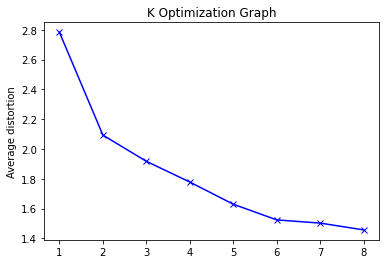

In [49]:
from scipy.spatial.distance import cdist
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pdata_z)
    prediction=model.predict(pdata_z)
    meanDistortions.append(sum(np.min(cdist(pdata_z, model.cluster_centers_, 'euclidean'), axis=1)) / pdata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K Optimization Graph')

There is room for intrepetation on which k is the best option. 

In [53]:
KNNModel = KMeans(n_clusters=4, n_init = 3, random_state=2345)
KNNModel.fit(pdata_z)
prediction=KNNModel.predict(pdata_z)
pdata_z["GROUP"] = prediction
pdata["GROUP"] = prediction

In [54]:
#Assess the distribution of clusters formed
pdata_z['GROUP'].value_counts()  

0    14029
1     4890
3     3569
2     1198
Name: GROUP, dtype: int64

In [55]:
pdata_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 0 to 30735
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             23686 non-null  float64
 1   accommodates          23686 non-null  float64
 2   bathrooms             23686 non-null  float64
 3   number_of_reviews     23686 non-null  float64
 4   review_scores_rating  23686 non-null  float64
 5   bedrooms              23686 non-null  float64
 6   beds                  23686 non-null  float64
 7   price                 23686 non-null  float64
 8   GROUP                 23686 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.7 MB


In [56]:
#centroids = KNNModel.cluster_centers_
#centroids

In [57]:
pdata_z.head()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP
0,0.387836,-0.104785,-0.40446,-0.606958,0.750683,-0.305115,-0.579447,0.011396,0
1,0.564938,1.735725,-0.40446,-0.510150,-0.138713,2.063599,0.985879,0.149352,1
2,0.337493,0.815470,-0.40446,-0.413342,-0.265770,-0.305115,0.985879,-0.024908,1
4,-0.006724,-0.564912,-0.40446,-0.558554,-6.872716,-1.489471,-0.579447,-0.242734,3
5,-0.455600,-0.564912,-0.40446,-0.582756,0.750683,-0.305115,-0.579447,-0.460559,0


In [58]:
pdata_z.nunique()

log_price               542
accommodates             16
bathrooms                16
number_of_reviews       313
review_scores_rating     48
bedrooms                 11
beds                     16
price                   542
GROUP                     4
dtype: int64

<Figure size 360x360 with 0 Axes>

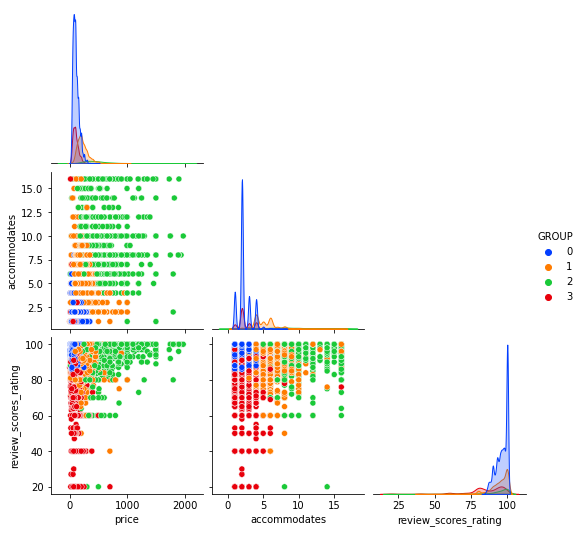

In [59]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

plt.figure(figsize=(5,5))
sns.pairplot(pdata,vars=pdata[['price','accommodates','review_scores_rating']], hue = "GROUP" ,diag_kind = 'kde', corner = True, palette='bright')
plt.show()

In [60]:
import plotly.express as px

fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='accommodates', color='GROUP', title="Comparing Scaled Reviews, Price, and Accomodations colored by Groups")
fig.show()

In [29]:
dataset=pdata[:]  #creating a copy of the data 
dataset['KmeansLabel']=KNNModel.labels_

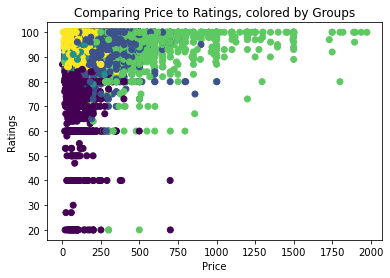

In [30]:
plt.scatter(dataset['price'], dataset['review_scores_rating'], c=KNNModel.labels_,)
plt.title("Comparing Price to Ratings, colored by Groups")
plt.xlabel("Price")
plt.ylabel("Ratings")
plt.show()

In [22]:
#fig1 = px.violin(pdata, y="price", x="accommodates", color="GROUP", box=True, points="all")
#fig1.show()

#### 3.2 Hierichial Clustering Analysis

##### 3.2.1 Selecting Optimal Clusters

##### 3.2.2 Validation Measures

##### 3.2.3 Results

In [31]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [32]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

linkage_methods = ['single', 'complete', 'average', 'ward', 'median']

results_cophenetic_coef=[]

for i in linkage_methods :
    #plt.figure(figsize=(15,13))
    #plt.xlabel('sample index')
    #plt.ylabel('Distance')
    Z = linkage(pdata_z, i)
    cc, coph_dists = cophenet(Z , pdist(pdata_z))
    #dendrogram(Z,leaf_rotation=90.0, p=5, leaf_font_size=10, truncate_mode='level')
    #plt.tight_layout()
    #plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    #plt.show()
    results_cophenetic_coef.append((i,cc))
    #print (i,cc)

In [33]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.726528
1,complete,0.776562
2,average,0.901769
3,ward,0.658353
4,median,0.536982


In [34]:
# cophenet index 
Z = linkage(pdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(pdata_z))

c

0.9017692035737797

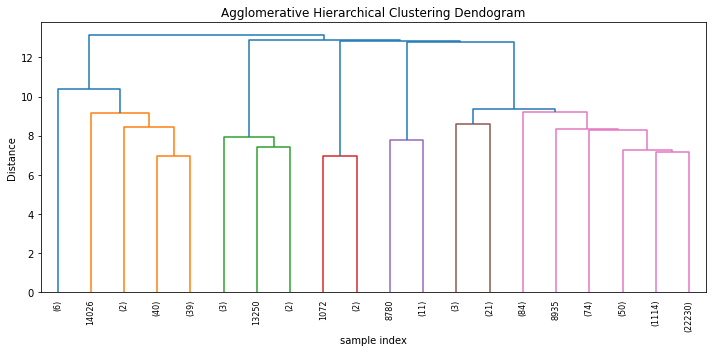

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [36]:
# cophenet index 
Z1 = linkage(pdata_z, metric='euclidean', method='ward')
c1, coph_dists1 = cophenet(Z1 , pdist(pdata_z))

c1

0.6583526425428029

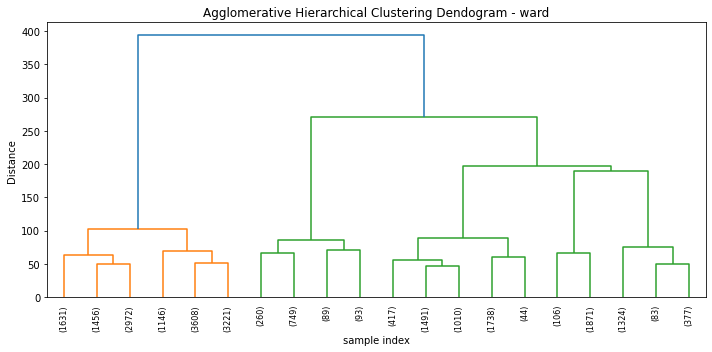

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [38]:
# cophenet index 
Z2 = linkage(pdata_z, metric='euclidean', method='complete')
c2, coph_dists2 = cophenet(Z2 , pdist(pdata_z))

c2



0.776562041974062

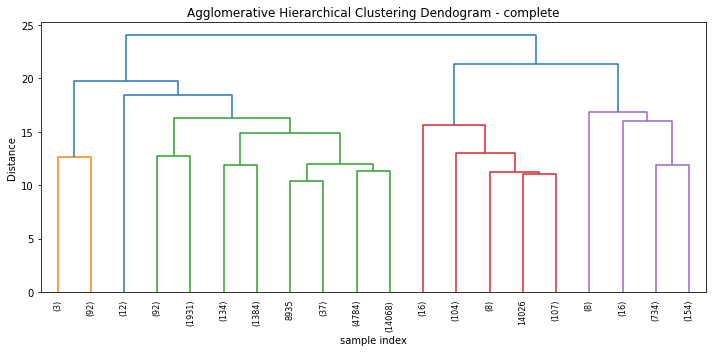

In [39]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [40]:
# cophenet index 
Z3 = linkage(pdata_z, metric='euclidean', method='centroid')
c3, coph_dists3 = cophenet(Z3 , pdist(pdata_z))

c3



MemoryError: Unable to allocate 2.09 GiB for an array with shape (280501455,) and data type float64

In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - centroid')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [61]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [62]:
set(clusters)  # So there are 3 clusters which are formed 

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45}

In [63]:
dataset['HierarchicalClusteringLabel']=clusters

In [64]:
from sklearn.metrics import silhouette_score
Kmeans_score =  silhouette_score(dataset.drop('KmeansLabel',axis=1),dataset['KmeansLabel'])
print("Kmeans silhouette : ", Kmeans_score)


Kmeans silhouette :  0.07851999539245395


In [65]:
Hierarchical_score = silhouette_score(dataset.drop('HierarchicalClusteringLabel',axis=1),dataset['HierarchicalClusteringLabel'])
print("Hierarchical silhouette ; ", Hierarchical_score)

Hierarchical silhouette ;  -0.5047938774555433


In [66]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,HierarchicalClusteringLabel
KmeansLabel,,,,,,,,,,
0,4.393484,2.523171,1.140704,8.917365,74.911223,0.998883,1.417644,96.510329,2.861530,42.810162
1,5.311131,5.139025,1.418778,21.893762,94.910368,1.993613,2.761550,224.612944,1.006813,43.751756
2,4.637499,2.760020,1.088280,132.832572,94.276509,0.943176,1.452055,113.925926,2.913749,43.256722
3,6.090074,8.958264,2.689482,22.525876,94.659432,3.472454,4.983306,520.097663,2.000000,33.939065
4,4.508103,2.254116,1.068786,16.664409,96.191888,0.899280,1.203222,102.661843,0.000000,43.998361


In [67]:
Hierarchical_results=dataset.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,KmeansLabel
HierarchicalClusteringLabel,,,,,,,,,,
1,6.482814,16.000000,3.500000,12.000000,99.000000,9.000000,15.500000,667.000000,2.000000,3.000000
2,6.023002,16.000000,5.750000,34.500000,94.500000,8.750000,14.500000,420.250000,2.000000,3.000000
3,7.528100,15.000000,6.500000,2.000000,100.000000,5.500000,8.500000,1860.000000,2.000000,3.000000
4,7.530542,9.000000,4.333333,12.166667,99.333333,3.500000,4.166667,1866.166667,2.000000,3.000000
5,7.114466,9.172414,4.672414,12.137931,97.724138,4.275862,5.172414,1243.724138,2.000000,3.000000
6,7.311456,15.500000,4.625000,16.000000,93.250000,5.500000,7.500000,1505.250000,2.000000,3.000000
7,7.090077,15.000000,6.000000,3.000000,93.000000,4.000000,11.000000,1200.000000,2.000000,3.000000
8,6.169112,12.666667,5.000000,6.333333,71.000000,5.333333,6.666667,482.000000,2.000000,3.000000
9,6.646276,14.194444,3.930556,19.833333,96.444444,5.777778,8.194444,794.888889,2.000000,3.000000


In [74]:
DBScan_results=dataset.groupby('labelsDBScan').mean()
DBScan_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,KmeansLabel,HierarchicalClusteringLabel
labelsDBScan,,,,,,,,,,,
-1,5.509967,7.569637,2.214191,46.465347,89.343234,2.655446,4.303630,378.484488,1.819142,2.111551,36.035644
0,4.472526,2.212454,1.077104,16.766762,96.199883,1.000000,1.184294,99.358113,0.000000,4.000000,43.998827
1,5.369831,6.121345,1.609649,17.878655,94.915205,3.000000,3.385965,231.081871,1.000000,0.998538,43.983918
2,5.405624,4.232877,1.103425,18.472603,95.478082,1.000000,2.279452,241.532877,1.000000,0.976712,44.000000
3,4.439669,2.382093,1.084009,70.084009,86.388725,1.000000,1.273029,95.689020,3.000000,1.053427,43.887988
4,5.296080,4.906323,1.404650,23.410171,94.866176,2.000000,2.554366,216.727334,1.000000,0.996989,43.997993
5,5.986527,7.014388,2.413669,14.244604,97.183453,3.000000,3.899281,418.503597,2.000000,3.000000,37.086331
6,4.774292,2.381745,1.000000,16.791619,96.039610,0.000000,1.216418,127.911596,0.000000,4.000000,44.000000
7,4.183530,1.785714,1.035714,4.928571,98.285714,3.000000,1.214286,71.357143,0.000000,4.000000,44.000000


#### 3.3 DBScan Clustering Analysis

##### 3.3.1 Selecting Optimal Clusters

##### 3.3.2 Validation Measures

##### 3.3.3 Results

In [69]:
from sklearn.cluster import DBSCAN

modelDBSCAN = DBSCAN(eps=0.99, min_samples=5).fit(pdata_z)
labelsDBSCAN = modelDBSCAN.labels_

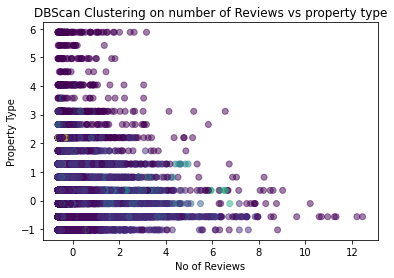

In [70]:
plt.scatter(pdata_z.number_of_reviews, pdata_z.accommodates,  c=labelsDBSCAN, alpha=0.5)
plt.title("DBScan Clustering on number of Reviews vs property type")
plt.xlabel("No of Reviews")
plt.ylabel("Property Type")
plt.show()

In [71]:
print(labelsDBSCAN)

[0 1 2 ... 0 4 1]


In [72]:
#Assess the distribution of clusters formed
pdata_z['labelsDBScan'] =   labelsDBSCAN
pdata['labelsDBScan'] =   labelsDBSCAN
dataset['labelsDBScan'] =   labelsDBSCAN

In [73]:
pdata_z['labelsDBScan'].value_counts()  

 0     11932
 4      2989
 3      2714
 6      1742
-1      1515
 2       730
 1       684
 9       417
 8       279
 5       278
 10      107
 15       77
 13       36
 11       25
 19       20
 12       19
 7        14
 18       10
 14        9
 16        9
 24        7
 22        7
 27        7
 20        6
 29        6
 17        6
 32        5
 31        5
 25        5
 28        5
 30        5
 23        5
 33        4
 26        4
 21        3
Name: labelsDBScan, dtype: int64

##### 2.3.2 K-Nearest Neighbors Classification

In [ ]:
get_ipython().run_line_magic('time', '')
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline


#pipe = make_pipeline(('scale', StandardScaler()),  ('knn', KNeighborsClassifier()))

pipe = Pipeline([('scale', StandardScaler()),  
                         ('knn', KNeighborsClassifier())]) 

# Define a range of hyper parameters for grid search
parameters = { 'knn__n_neighbors': [10,45,50]
              , 'knn__algorithm' : ["auto", "ball_tree", "kd_tree", "brute"]
             }

#Perform the grid search using accuracy as a metric during cross validation.
gridKnn = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy') # can try f1_micro, f1_maco accuracy....

#Use the best features from recursive feature elimination during the grid search
gridKnn.fit(X_train_scaled_cls, y_train_cls)

#display the best pipeline model identified during the grid search
gridKnn.best_estimator_

In [ ]:
gridKnn.best_params_

In [ ]:
KNNmodelFINAL = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 45) # get object
KNNmodelFINAL.fit(X_train_scaled_cls, y_train_cls)
KNNy_hat = KNNmodelFINAL.predict(X_test_scaled_cls)

In [ ]:
from sklearn.model_selection import cross_val_score
KNNaccuracies = cross_val_score(KNNmodelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(KNNaccuracies)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(KNNmodelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,KNNy_hat))

print(classification_report(y_test_cls,KNNy_hat))

In [ ]:
KNN_ac = round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3)

print(KNN_ac)

<AxesSubplot:xlabel='HierarchicalClusteringLabel'>

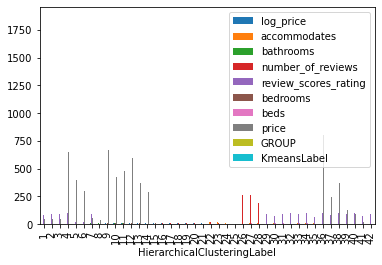

In [84]:
Kmeans_results.plot.bar()

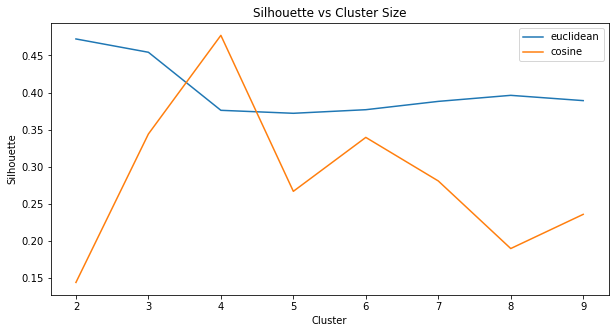

In [103]:
# referenced from class example
from sklearn import metrics
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(pdata_z)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(pdata_z, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(pdata_z, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

#### 3.4 Comparison of all Clustering Techniques

In [ ]:
#Comparison of the Clustering
data = pdata_z

cls = DBSCAN(eps=0.125, min_samples=6)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=14, linkage='complete')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=17, random_state=1)
cls.fit(data)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('Parch')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data[:, 0], data[:, 2]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('SibSp')
    plt.grid()
    plt.title(title[i])
    
    


plt.tight_layout()
plt.show()

### 4. Deployment

### 5. Exceptional Work